In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns

# Data preprocessing

In [3]:
df = pd.read_csv('h1b_kaggle.csv')
df.isnull().sum()
df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3002458 entries, 0 to 3002457
Data columns (total 11 columns):
Unnamed: 0            int64
CASE_STATUS           object
EMPLOYER_NAME         object
SOC_NAME              object
JOB_TITLE             object
FULL_TIME_POSITION    object
PREVAILING_WAGE       float64
YEAR                  float64
WORKSITE              object
lon                   float64
lat                   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 252.0+ MB


## Analysis of Application Status
### Number of Applications from 2011 to 2016
<li> The number of applications is increasing from 2011 to 2016.
<li> The number of certified applications is increasing, too. But the number of other status is almost the same.
<li> The quota of H1B is almost same every year, which means it become harder and harder to get the appliation certified.

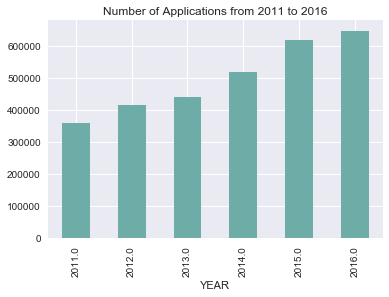

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

with sns.cubehelix_palette(start=.3, rot=-.5,dark=0.6,light=1,reverse=True):
    df.groupby('YEAR').size().plot(title='Number of Applications from 2011 to 2016',kind='bar',figsize=(6,4))

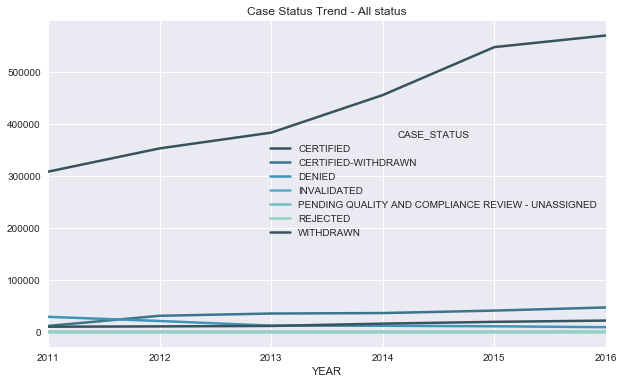

In [4]:
plt.rcParams["figure.figsize"] = (10,6)

with sns.color_palette("GnBu_d"):
    pd.crosstab(df.YEAR,df.CASE_STATUS).plot(title='Case Status Trend - All status',linewidth=2.5)

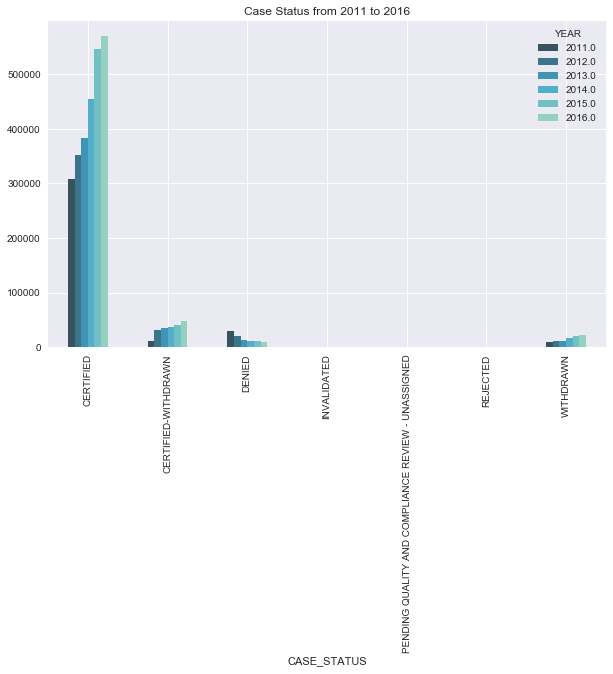

In [5]:
%matplotlib inline
with sns.color_palette(("GnBu_d"), 6):
    df[['CASE_STATUS','YEAR']].groupby(['CASE_STATUS','YEAR']).size().unstack().plot(kind='bar',title="Case Status from 2011 to 2016",figsize=(10,6))

## Influence Element: Job title

<li> The top 1 job title certified is Programmer analyst

In [6]:
data = df.groupby('JOB_TITLE').size()
top_10_title = data.sort_values(ascending=False)[:10]
print(top_10_title)

JOB_TITLE
PROGRAMMER ANALYST          249038
SOFTWARE ENGINEER           121307
COMPUTER PROGRAMMER          70570
SYSTEMS ANALYST              61965
SOFTWARE DEVELOPER           42907
BUSINESS ANALYST             39681
COMPUTER SYSTEMS ANALYST     35086
TECHNOLOGY LEAD - US         28350
SENIOR SOFTWARE ENGINEER     27133
TECHNOLOGY ANALYST - US      26055
dtype: int64


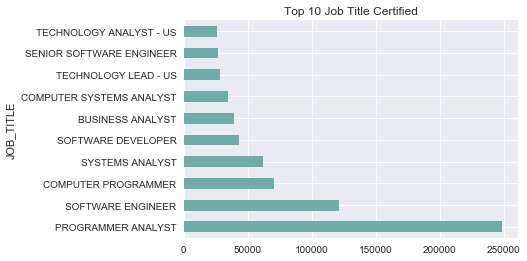

In [14]:
%matplotlib inline
with sns.cubehelix_palette(start=.3, rot=-.5,dark=0.6,light=1,reverse=True):
    df.groupby('JOB_TITLE').CASE_STATUS.count().nlargest(10).plot(kind='barh',title='Top 10 Job Title Certified')

## Influence Element: Employer
<li> Infosys Limited (formerly Infosys Technologies Limited) is the top 1 Employer.
<li> It is an Indian multinational corporation that provides business consulting, information technology and outsourcing services.

In [8]:
df['EMPLOYER_NAME'].value_counts().head(10)

INFOSYS LIMITED                                    130592
TATA CONSULTANCY SERVICES LIMITED                   64726
WIPRO LIMITED                                       48117
DELOITTE CONSULTING LLP                             36742
IBM INDIA PRIVATE LIMITED                           34219
ACCENTURE LLP                                       33447
MICROSOFT CORPORATION                               25576
HCL AMERICA, INC.                                   22678
ERNST & YOUNG U.S. LLP                              18232
COGNIZANT TECHNOLOGY SOLUTIONS U.S. CORPORATION     17528
Name: EMPLOYER_NAME, dtype: int64

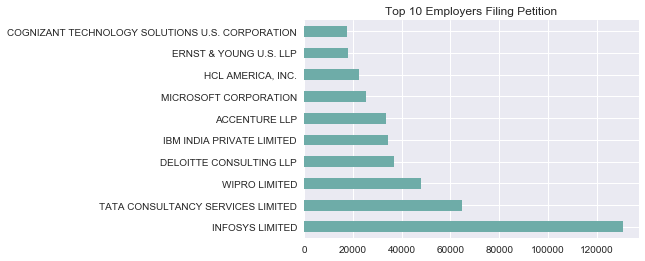

In [19]:
with sns.cubehelix_palette(start=.3, rot=-.5,dark=0.6,light=1,reverse=True):
    df['EMPLOYER_NAME'].value_counts().nlargest(10).plot(kind='barh',title='Top 10 Employers Filing Petition')

## Influence Element: Worksite
<li> New York will be the ideal workplace if you want to apply H1b.

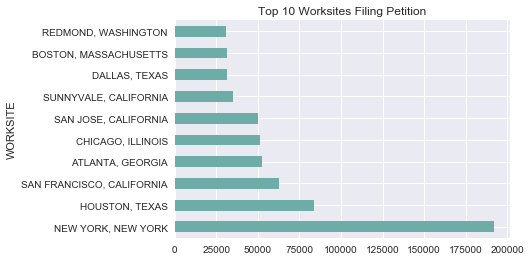

In [18]:
plt.rcParams["figure.figsize"] = (6,4)
with sns.cubehelix_palette(start=.3, rot=-.5,dark=0.6,light=1,reverse=True):
    df.groupby('WORKSITE').CASE_STATUS.count().nlargest(10).plot(kind='barh',title='Top 10 Worksites Filing Petition')

<li> For student who are insterested in working in New York, EY is the employer having submitted the largest number of H1B visa applications.

In [10]:
subnewyork=df[df['WORKSITE'] == 'NEW YORK, NEW YORK']
subnewyork['EMPLOYER_NAME'].value_counts().head(25)

ERNST & YOUNG U.S. LLP                    4481
INFOSYS LIMITED                           2759
JPMORGAN CHASE & CO.                      2638
GOLDMAN, SACHS & CO.                      2376
CREDIT SUISSE SECURITIES (USA) LLC        2123
BLOOMBERG, LP                             2068
TATA CONSULTANCY SERVICES LIMITED         2004
DELOITTE CONSULTING LLP                   1922
COLUMBIA UNIVERSITY                       1735
GOOGLE INC.                               1590
MORGAN STANLEY & CO. LLC                  1551
BARCLAYS SERVICES CORP.                   1537
CAPGEMINI AMERICA INC                     1482
WIPRO LIMITED                             1429
CITIGROUP GLOBAL MARKETS INC.             1186
MEMORIAL SLOAN-KETTERING CANCER CENTER    1060
NEW YORK UNIVERSITY SCHOOL OF MEDICINE    1055
LARSEN & TOUBRO INFOTECH LIMITED          1043
BANK OF AMERICA N.A.                      1019
CITIBANK, N.A.                            1017
KPMG LLP                                  1007
DELOITTE & TO

In [11]:
import gmplot


gmap = gmplot.GoogleMapPlotter.from_geocode('New York',4)
gmap.heatmap(df['lat'], df['lon'])
gmap.draw('location.html')

## Influence Element: salary
<li> The prevailing wage is normally distributed.

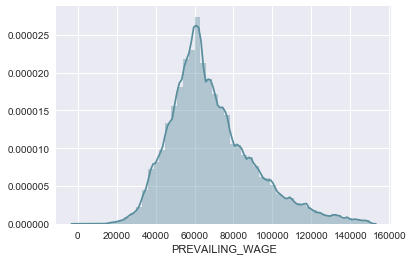

In [12]:
subwage = df[(df['PREVAILING_WAGE']>= 0) & (df['PREVAILING_WAGE']<=150000)]
with sns.cubehelix_palette(start=.3, rot=-.5,dark=0.5,light=1,reverse=True):
    sns.distplot(subwage['PREVAILING_WAGE'])